In [1]:
# pip install folium

In [2]:
import pandas as pd

data = pd.read_csv('train.csv')

data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [4]:
data.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [5]:
data.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [6]:
# Convertir la columna Dates a datetime 
data['Dates'] = pd.to_datetime(data['Dates'])

In [7]:
import folium
from folium.plugins import MarkerCluster
import webbrowser


# Tomar una muestra aleatoria de 1000 registros
data_sample = data.sample(1000, random_state=42)

# Crear el mapa centrado en San Francisco

sf_center = [37.7749, -122.4194]
m = folium.Map(location=sf_center, zoom_start=12)


# Agregar clusters de marcadores
marker_cluster = MarkerCluster().add_to(m)


# Agregar cada marcador
for idx, row in data_sample.iterrows():
    folium.Marker(
        location=[row['Y'], row['X']],
        popup=(
            f"<b>Category:</b> {row['Category']}<br>"
            f"<b>Description:</b> {row['Descript']}<br>"
            f"<b>Date:</b> {row['Dates']}<br>"
            f"<b>Address:</b> {row['Address']}"
        )
    ).add_to(marker_cluster)

# Guardar el archivo HTML
output_file = 'crime_map_1000.html'
m.save(output_file)

# Abrir el archivo automáticamente en el navegador
webbrowser.open(output_file)


True

In [8]:
# crear columnas dia de la semana

data['day_of_week'] = data['Dates'].dt.dayofweek

In [9]:
# crear columna de mes

data['month'] = data['Dates'].dt.month

In [10]:
# crear columna dia

data['day'] = data['Dates'].dt.day

In [11]:
# marcar los fines de semana

data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >=5 else 0)


In [12]:
# pip install holidays

In [13]:
import holidays

us_holidays = holidays.US()
data['is_holiday'] = data['Dates'].dt.date.isin(us_holidays).astype(int)

In [14]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,day_of_week,month,day,is_weekend,is_holiday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2,5,13,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2,5,13,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2,5,13,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2,5,13,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2,5,13,0,0


In [15]:
data = data.drop(columns=['DayOfWeek'])
data = data.drop(columns=['Address'])
data = data.drop(columns=['Descript'])

In [16]:
data.head()

,Dates,Category,PdDistrict,Resolution,X,Y,day_of_week,month,day,is_weekend,is_holiday
0,2015-05-13 23:53:00,WARRANTS,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599,2,5,13,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599,2,5,13,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,NORTHERN,"ARREST, BOOKED",-122.424363,37.800414,2,5,13,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,NORTHERN,NONE,-122.426995,37.800873,2,5,13,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,PARK,NONE,-122.438738,37.771541,2,5,13,0,0


In [17]:
from sklearn.preprocessing import LabelEncoder

# Category
le_category = LabelEncoder()
data['Category'] = le_category.fit_transform(data['Category'])

# Resolution
le_resolution = LabelEncoder()
data['Resolution'] = le_resolution.fit_transform(data['Resolution'])

# PdDistrict (one-hot)
data = pd.get_dummies(data, columns=['PdDistrict'], prefix='PD')



data.head()

,Dates,Category,Resolution,X,Y,day_of_week,month,day,is_weekend,is_holiday,PD_BAYVIEW,PD_CENTRAL,PD_INGLESIDE,PD_MISSION,PD_NORTHERN,PD_PARK,PD_RICHMOND,PD_SOUTHERN,PD_TARAVAL,PD_TENDERLOIN
0,2015-05-13 23:53:00,37,0,-122.425892,37.774599,2,5,13,0,0,False,False,False,False,True,False,False,False,False,False
1,2015-05-13 23:53:00,21,0,-122.425892,37.774599,2,5,13,0,0,False,False,False,False,True,False,False,False,False,False
2,2015-05-13 23:33:00,21,0,-122.424363,37.800414,2,5,13,0,0,False,False,False,False,True,False,False,False,False,False
3,2015-05-13 23:30:00,16,11,-122.426995,37.800873,2,5,13,0,0,False,False,False,False,True,False,False,False,False,False
4,2015-05-13 23:30:00,16,11,-122.438738,37.771541,2,5,13,0,0,False,False,False,False,False,True,False,False,False,False


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Dates          878049 non-null  datetime64[ns]
 1   Category       878049 non-null  int64         
 2   Resolution     878049 non-null  int64         
 3   X              878049 non-null  float64       
 4   Y              878049 non-null  float64       
 5   day_of_week    878049 non-null  int32         
 6   month          878049 non-null  int32         
 7   day            878049 non-null  int32         
 8   is_weekend     878049 non-null  int64         
 9   is_holiday     878049 non-null  int64         
 10  PD_BAYVIEW     878049 non-null  bool          
 11  PD_CENTRAL     878049 non-null  bool          
 12  PD_INGLESIDE   878049 non-null  bool          
 13  PD_MISSION     878049 non-null  bool          
 14  PD_NORTHERN    878049 non-null  bool          
 15  

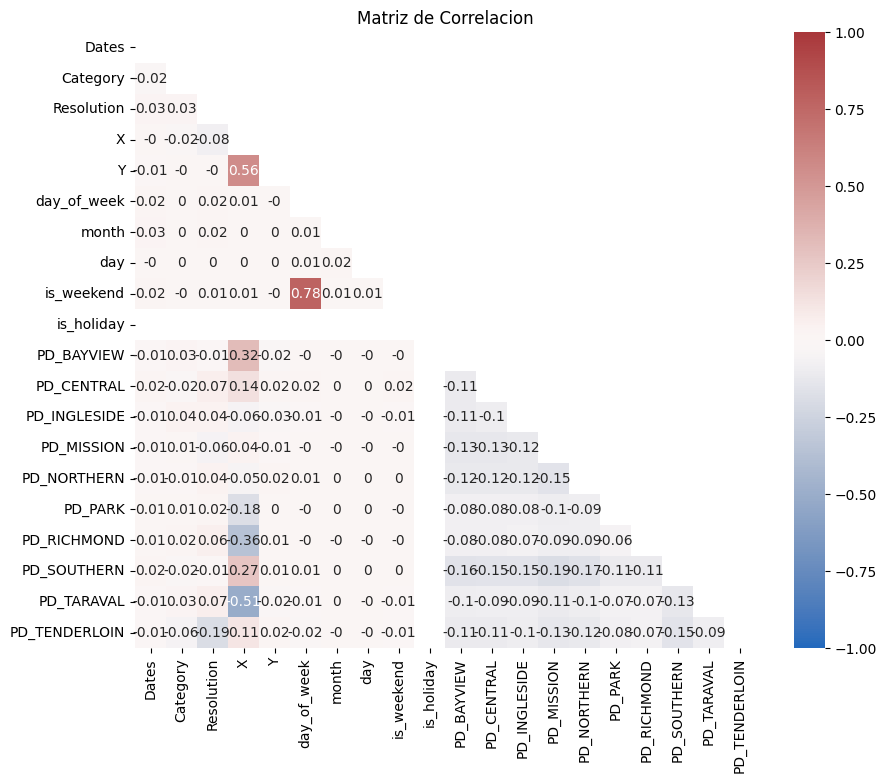

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlacion entre series
import numpy as np
matrix = data.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title('Matriz de Correlacion')
plt.show()


In [20]:
# agrupamos delitos por día, en una variable auxiliar
delitos_por_dia = data.groupby(data['Dates'].dt.date).size()

# convertir el índice a datetime para consistencia
delitos_por_dia.index = pd.to_datetime(delitos_por_dia.index)


In [21]:
#establecer fecha como indice

data.set_index('Dates', inplace=True)

data.head()

,Category,Resolution,X,Y,day_of_week,month,day,is_weekend,is_holiday,PD_BAYVIEW,PD_CENTRAL,PD_INGLESIDE,PD_MISSION,PD_NORTHERN,PD_PARK,PD_RICHMOND,PD_SOUTHERN,PD_TARAVAL,PD_TENDERLOIN
Dates,,,,,,,,,,,,,,,,,,,
2015-05-13 23:53:00,37,0,-122.425892,37.774599,2,5,13,0,0,False,False,False,False,True,False,False,False,False,False
2015-05-13 23:53:00,21,0,-122.425892,37.774599,2,5,13,0,0,False,False,False,False,True,False,False,False,False,False
2015-05-13 23:33:00,21,0,-122.424363,37.800414,2,5,13,0,0,False,False,False,False,True,False,False,False,False,False
2015-05-13 23:30:00,16,11,-122.426995,37.800873,2,5,13,0,0,False,False,False,False,True,False,False,False,False,False
2015-05-13 23:30:00,16,11,-122.438738,37.771541,2,5,13,0,0,False,False,False,False,False,True,False,False,False,False


✅ X_train.shape: (1775, 30, 1)
✅ X_test.shape : (444, 30, 1)
Epoch 1/100


C:\Users\Diego\anaconda3\envs\gpu_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9168 - val_loss: 0.8881
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8453 - val_loss: 0.8691
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8353 - val_loss: 0.8616
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8308 - val_loss: 0.8608
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8277 - val_loss: 0.8614
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8245 - val_loss: 0.8618
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8198 - val_loss: 0.8592
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8092 - val_loss: 0.8523
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7977 - val_loss: 0.8598
Epoch 10/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7911 - val_loss: 0.8618
Epoch 11/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7865 - val_loss: 0.8587
Epoch 12/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

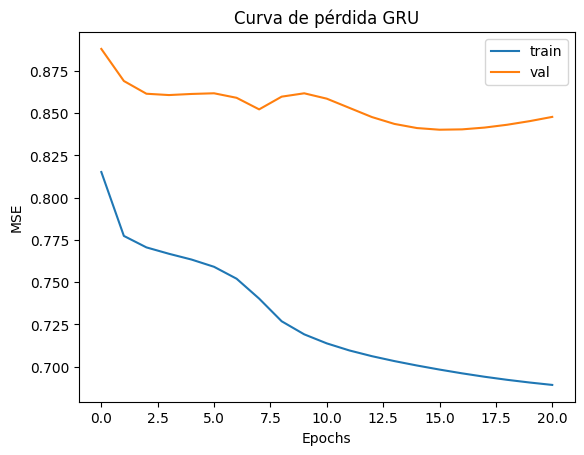

✅ Early stopping aplicado, epochs finales: 21


In [22]:
# -------------------------------------------
# Librerías
# -------------------------------------------
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Semillas para reproducibilidad
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


# Escalar la serie
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(delitos_por_dia.values.reshape(-1,1))

# -------------------------------------------
# Crear secuencias
# -------------------------------------------
def create_sequences(series, window_size=30):
    X, y = [], []
    for i in range(window_size, len(series)):
        X.append(series[i-window_size:i])
        y.append(series[i])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(crime_scaled, window_size)

# -------------------------------------------
# Separar train / test por porcentaje (más seguro)
# -------------------------------------------
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("✅ X_train.shape:", X_train.shape)
print("✅ X_test.shape :", X_test.shape)

# -------------------------------------------
# Modelo GRU
# -------------------------------------------
model = Sequential()
model.add(GRU(64, activation='tanh', input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Early stopping
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=100, batch_size=16, callbacks=[es]
)

# -------------------------------------------
# Curva de pérdida
# -------------------------------------------
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title("Curva de pérdida GRU")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

print(f"✅ Early stopping: {len(history.history['loss'])}")


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# predicción
y_pred = model.predict(X_test)

# inversa del escalado
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# métricas
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"GRU MAE: {mae:.2f}")
print(f"GRU RMSE: {rmse:.2f}")
print(f"GRU R2: {r2:.2f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
GRU MAE: 34.12
GRU RMSE: 44.72
GRU R2: 0.17
